In [14]:
import sys
import os
sys.path.append('/home/tpopova/prj/polymer_brush')


from py_utils.annealing_brush import annealing_anion
from py_utils.quenched_brush import quecnhed_br

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation
class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)

def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

In [15]:
#ПАРАМЕТРЫ
N = 400
S = 100
Cs = 0.001

pK_brush = 5
pK_minus = 5
pK_plus = 9
# f_plus = 0.4778
f_plus = 0.334


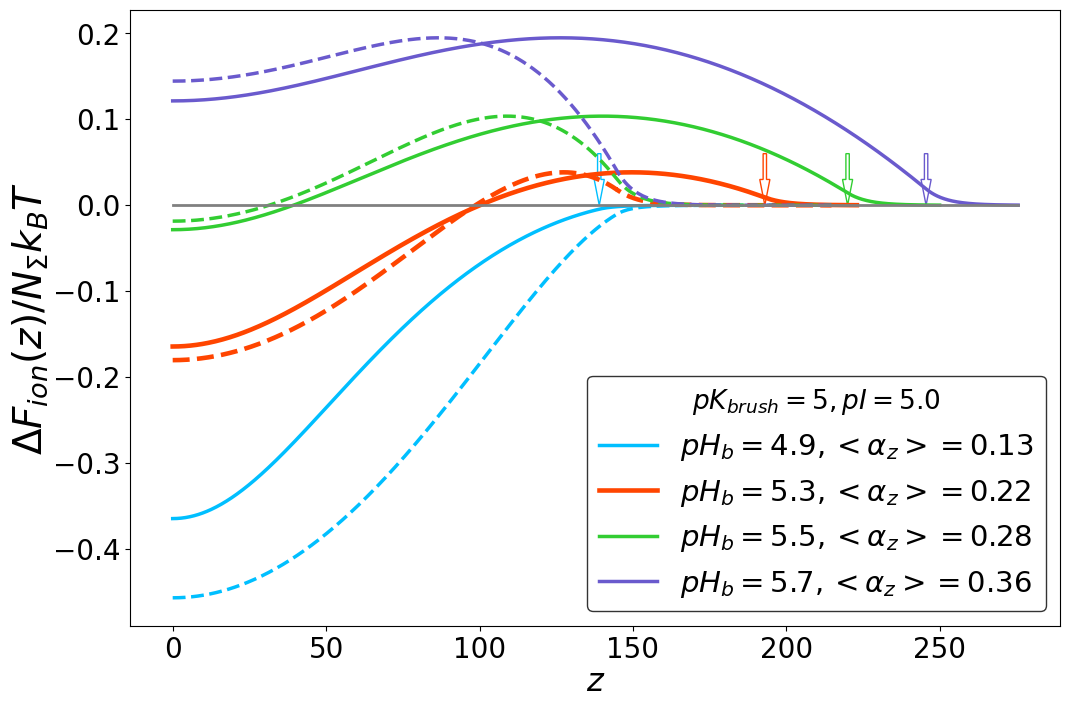

In [18]:
delta_pK_brush = [0.1, -0.3, -0.5, -0.7]
colors = ['deepskyblue', 'orangered', 'limegreen', 'slateblue', 'blue', 'pink', 'olive']
sizes = [2.5, 3.3, 2.5, 2.5, 2.5]

fig, ax = plt.subplots(nrows=1, ncols =1)

for delt_pK, color, size in zip(delta_pK_brush, colors, sizes):
        #СЛАБАЯ ЩЕТКА

        H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi, tild_Q  = annealing_anion(
        N = N, 
        S = S,
        Cs = Cs,
        delta_pK = delt_pK, #Отступ от ИЭТ белка
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = 'annealing_brush_temp.pro', 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')
        
        #СИЛЬНАЯ ЩЕТКА

        H_q, Lambda, \
        d_pH_b, pH_iep_in_quen, \
        z_in_range_q, z_out_range_q, y_in, y_out, y_exp_in, y_exp_out, y_exp_q_in, y_exp_q_out, \
        f_ion_SCF_quen, Q_SCF_quen, parse_SCF_psi_quen, parse_SCF_phi_quen = quecnhed_br(
        
                N = N, 
                S = S, 
                alpha = 0.22,
                Cs = Cs,
                PK_MINUS = pK_minus,
                PK_PLUS = pK_plus,
                f_plus = f_plus,
                
                pH_B = pH_b,

                file_names = 'annealing_brush_temp.pro',
                way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')
                   
        
        
        ax.plot(np.hstack((z_in_range, z_out_range)), np.hstack((f_ion_in, f_ion_out)), linestyle = '-',
        linewidth = size, color = color, label = f'$pH_b = {round(pH_b, 4)}, <\\alpha_z> = {round(alpha_z_mean, 2)}$')
        
        ax.plot(np.hstack((z_in_range_q, z_out_range_q)), np.hstack((y_exp_in, y_exp_out)), linestyle = '--',
        linewidth = size, color = color)
        
        # ax.plot(np.hstack((z_in_range, z_out_range)), np.hstack((charge_in, charge_out)), linestyle = '-',
        # linewidth = 2.5, color = color, label = f'$pH_b = {round(pH_b, 4)}, <\\alpha_z> = {alpha_z_mean}, <Q> = {round(tild_Q, 2)}$')
        
        # ax.plot(np.hstack((z_in_range_q, z_out_range_q)), np.hstack((y_exp_q_in, y_exp_q_out)), linestyle = '--',
        # linewidth = 2.5, color = color, label = f'$quenched, \\alpha = {round(alpha_z_mean, 2)}$')
        
        ax.arrow(H, 0.06, 0, -0.03,
               width=1.1,
               head_length=0.03,
               edgecolor = color,
               linestyle = '-',
               facecolor = 'white')
        
        # ax.arrow(H_q, 0.06, 0, -0.03,
        #        width=1.1,
        #        head_length=0.03,
        #        edgecolor = 'red',
        #        linestyle = '--',
        #        facecolor = 'white')

ax.plot(np.hstack((z_in_range, z_out_range)), [0]*len(np.hstack((z_in_range, z_out_range))), linestyle = '-',
        linewidth = 2, color = 'gray')


ax.legend(title = f'$pK_{{brush}} = {pK_brush}, pI = {round(pH_iep, 2)}$',
    fontsize = 21, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '19', 
        loc = 'lower right')

# ax.legend(title = f'$f_{{+}} = {round(f_plus, 2)}, pK_{{+}} = {pK_plus}, pK_{{-}} = {pK_minus}, pI = {round(pH_iep, 2)}$',
#     fontsize = 14, 
#         ncol = 1, 
#         facecolor = 'white', 
#         edgecolor = 'black', 
#         title_fontsize = '14', 
#         loc = 'upper right')

fig.set_figwidth(12)
fig.set_figheight(8)

ax.set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

# ax.set_xlabel('$z$', 
#         fontsize = 23,
#         color = 'black', 
#         labelpad = 2.5)


ax.set_ylabel("$\Delta F_{ion}(z)/N_\Sigma k_{B}T$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)

# ax.set_ylabel("$Q(z)/N_\Sigma k_{B}T$",
#         fontsize = 28,
#         color = 'black', 
#         labelpad = 2.5)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
# save = fig.savefig('F_anneal_quenched.pdf', dpi = 200)

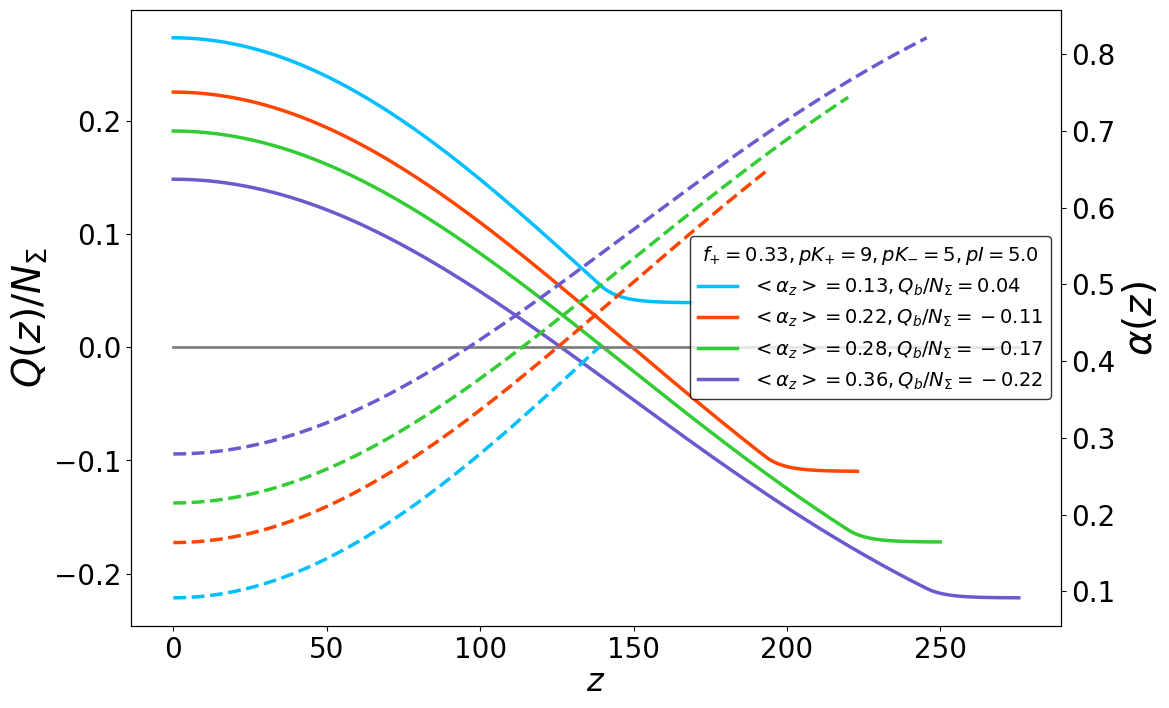

In [17]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for delt_pK, color in zip(delta_pK_brush, colors):
        #СЛАБАЯ ЩЕТКА

        H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi, tild_Q  = annealing_anion(
        N = N, 
        S = S,
        Cs = Cs,
        delta_pK = delt_pK, #Отступ от ИЭТ белка
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = 'annealing_brush_temp.pro', 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')
        
        #СИЛЬНАЯ ЩЕТКА

        H_q, Lambda, \
        d_pH_b, pH_iep_in_quen, \
        z_in_range_q, z_out_range_q, y_in, y_out, y_exp_in, y_exp_out, y_exp_q_in, y_exp_q_out, \
        f_ion_SCF_quen, Q_SCF_quen, parse_SCF_psi_quen, parse_SCF_phi_quen = quecnhed_br(
        
                N = N, 
                S = S, 
                alpha = 0.22,
                Cs = Cs,
                PK_MINUS = pK_minus,
                PK_PLUS = pK_plus,
                f_plus = f_plus,
                
                pH_B = pH_b,

                file_names = 'annealing_brush_temp.pro',
                way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')
                   

        
        ax1.plot(np.hstack((z_in_range, z_out_range)), np.hstack((charge_in, charge_out)), linestyle = '-',
        linewidth = 2.5, color = color, label = f'$<\\alpha_z> = {round(alpha_z_mean, 2)}, Q_b/N_{{\Sigma}} = {round(tild_Q, 2)}$')
        
        ax2.plot(z_in_range, alpha_z, linestyle = '--',
        linewidth = 2.5, color = color)
        
        # ax.plot(np.hstack((z_in_range_q, z_out_range_q)), np.hstack((y_exp_q_in, y_exp_q_out)), linestyle = '--',
        # linewidth = 2.5, color = color, label = f'$quenched, \\alpha = {round(alpha_z_mean, 2)}$')
        
        

ax1.plot(np.hstack((z_in_range, z_out_range)), [0]*len(np.hstack((z_in_range, z_out_range))), linestyle = '-',
        linewidth = 2, color = 'gray')


ax1.legend(title = f'$f_{{+}} = {round(f_plus, 2)}, pK_{{+}} = {pK_plus}, pK_{{-}} = {pK_minus}, pI = {round(pH_iep, 2)}$',
    fontsize = 14, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '14', 
        loc = 'center right')

fig.set_figwidth(12)
fig.set_figheight(8)

ax1.set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

ax1.set_ylabel("$Q(z)/N_\Sigma$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)

ax2.set_ylabel('$\\alpha(z)$', color='black', fontsize = 28)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
# save = fig.savefig('Q_anneal.pdf', dpi = 200)